<a href="https://colab.research.google.com/github/AphiweNom213/AphiweNom213/blob/main/Stock_Prediction_for_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting stock using LSTM

Once file is uploaded We can start importing other Libraries and tools we will need


In [87]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

data_set = pd.read_csv('/content/GOOG.csv')
data_set

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4869,2023-12-21,140.770004,142.029999,140.473007,141.800003,141.800003,18101500
4870,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
4871,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
4872,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400


For this project we will isolate 2 rows that will be important for us, "Date" and "Close"

In [70]:
data_set = data_set[["Date", "Close"]]

data_set

,Date,Close
0,2004-08-19,2.499133
1,2004-08-20,2.697639
2,2004-08-23,2.724787
3,2004-08-24,2.611960
4,2004-08-25,2.640104
...,...,...
4869,2023-12-21,141.800003
4870,2023-12-22,142.720001
4871,2023-12-26,142.820007
4872,2023-12-27,141.440002


Changing the date from a string into a date type

In [71]:
def str_to_datetime(s):
  splt = s.split('-')
  year, month, day = int(splt[0]), int(splt[1]), int(splt[2])
  return dt.datetime(year = year, month = month, day = day)

datetime_object = str_to_datetime('2023-12-28')
datetime_object



datetime.datetime(2023, 12, 28, 0, 0)

Changing every date to the datetime

In [72]:
data_set['Date'] = data_set['Date'].apply(str_to_datetime)
data_set

<ipython-input-72-73c2a5675bef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Date'] = data_set['Date'].apply(str_to_datetime)


,Date,Close
0,2004-08-19,2.499133
1,2004-08-20,2.697639
2,2004-08-23,2.724787
3,2004-08-24,2.611960
4,2004-08-25,2.640104
...,...,...
4869,2023-12-21,141.800003
4870,2023-12-22,142.720001
4871,2023-12-26,142.820007
4872,2023-12-27,141.440002


In [73]:
data_set.index = data_set.pop('Date')
data_set

,Close
Date,
2004-08-19,2.499133
2004-08-20,2.697639
2004-08-23,2.724787
2004-08-24,2.611960
2004-08-25,2.640104
...,...
2023-12-21,141.800003
2023-12-22,142.720001
2023-12-26,142.820007


Plotting the information in a graph

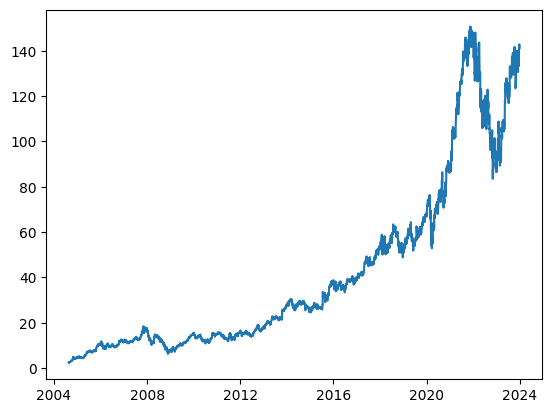

In [74]:
plt.plot(data_set.index, data_set['Close'])

Creating a Windowed Dataframe

In [80]:
def ds_to_windowed_ds(dataframe, first_date_str, last_date_str, n=4):
  first_date = str_to_datetime(first_date_str)
  last_date = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+dt.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = dt.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_ds = ds_to_windowed_ds(data_set,
                                '2004-08-25',
                                '2023-12-28',
                                n=4)
windowed_ds

,Target Date,Target-4,Target-3,Target-2,Target-1,Target
0,2004-08-25,2.499133,2.697639,2.724787,2.611960,2.640104
1,2004-08-26,2.697639,2.724787,2.611960,2.640104,2.687676
2,2004-08-27,2.724787,2.611960,2.640104,2.687676,2.643840
3,2004-08-30,2.611960,2.640104,2.687676,2.643840,2.540727
4,2004-08-31,2.640104,2.687676,2.643840,2.540727,2.549693
...,...,...,...,...,...,...
4865,2023-12-21,133.839996,137.190002,138.100006,139.660004,141.800003
4866,2023-12-22,137.190002,138.100006,139.660004,141.800003,142.720001
4867,2023-12-26,138.100006,139.660004,141.800003,142.720001,142.820007
4868,2023-12-27,139.660004,141.800003,142.720001,142.820007,141.440002


Changing the data into numpy arrays

In [81]:
def windowed_dataset_Date_X_y(windowed_ds):
  df_as_np = windowed_ds.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_dataset_Date_X_y(windowed_ds)

dates.shape, X.shape, y.shape

((4870,), (4870, 4, 1), (4870,))

Ploting Train, Testing and Validating Data

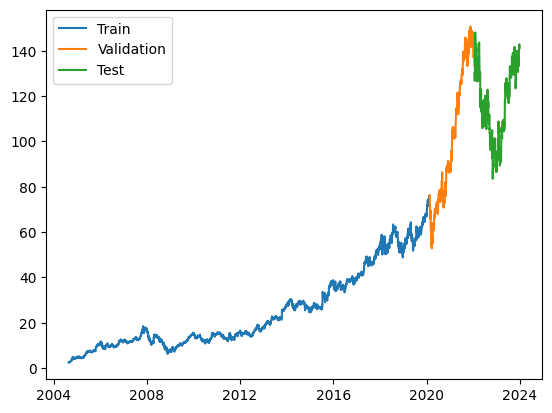

In [82]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((4, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
122/122 [==============================] - 4s 10ms/step - loss: 322.2631 - mean_absolute_error: 10.7053 - val_loss: 2495.1572 - val_mean_absolute_error: 40.0910
Epoch 2/100
122/122 [==============================] - 1s 5ms/step - loss: 0.6622 - mean_absolute_error: 0.4150 - val_loss: 1981.6310 - val_mean_absolute_error: 34.0867
Epoch 3/100
122/122 [==============================] - 1s 5ms/step - loss: 0.3906 - mean_absolute_error: 0.3785 - val_loss: 1807.9952 - val_mean_absolute_error: 31.8662
Epoch 4/100
122/122 [==============================] - 1s 5ms/step - loss: 0.3365 - mean_absolute_error: 0.3768 - val_loss: 1708.3527 - val_mean_absolute_error: 30.6921
Epoch 5/100
122/122 [==============================] - 1s 5ms/step - loss: 0.2726 - mean_absolute_error: 0.3265 - val_loss: 1650.0804 - val_mean_absolute_error: 29.9532
Epoch 6/100
122/122 [==============================] - 1s 5ms/step - loss: 0.2601 - mean_absolute_error: 0.3264 - val_loss: 1605.4924 - val_mean_absolu

122/122 [==============================] - 1s 3ms/step


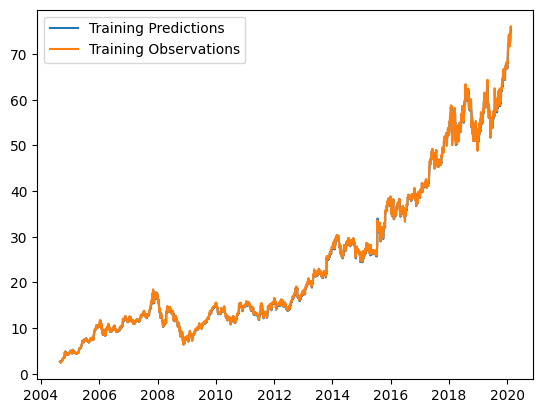

In [89]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

16/16 [==============================] - 0s 3ms/step


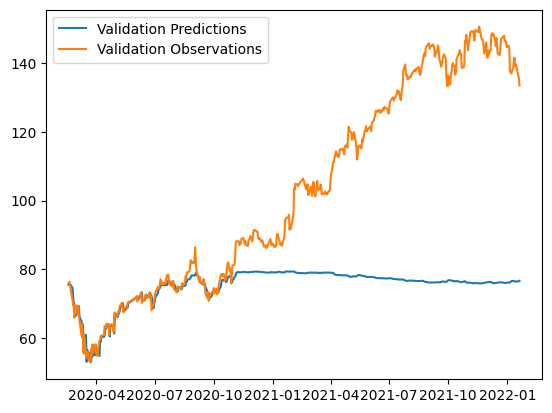

In [90]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

16/16 [==============================] - 0s 4ms/step


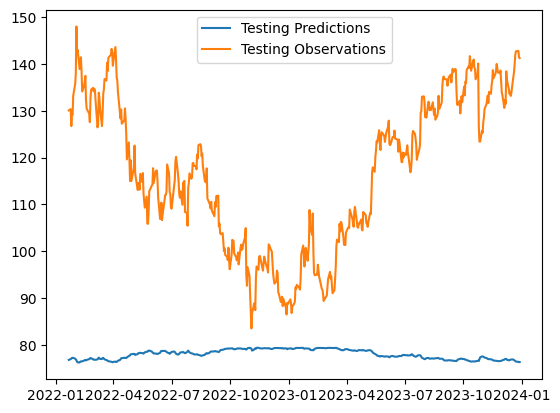

In [93]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

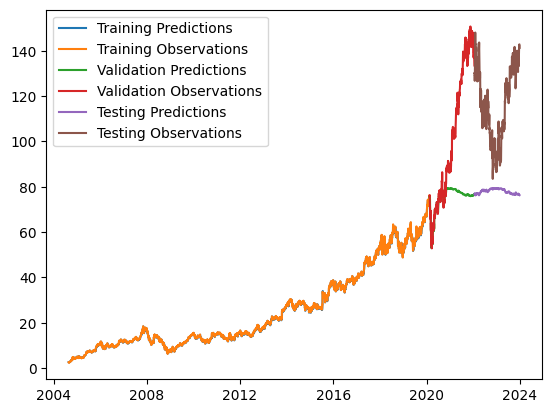

In [94]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [95]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 21ms/step


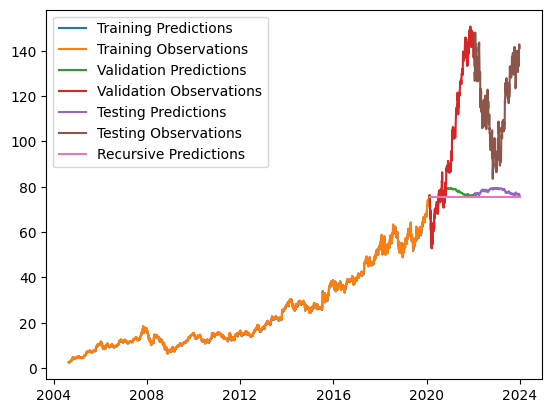

In [97]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])